<a href="https://colab.research.google.com/github/codedreamerD/C3-A-03_Room1/blob/main/Room_1_Analisis_Data_Penjualan_Produk_Cetakan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Data Penjualan Produk Cetakan

## Menentukan Pertanyaan Bisnis
- a
- b

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Membaca dataset
df = pd.read_csv('data_penjualan.csv', delimiter=';')

# Menampilkan beberapa baris pertama
df.head()

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
0,05/08/2022,Foodpak260,1000,1800,1800000
1,05/08/2022,FoodpakMatte245,1000,1900,1900000
2,05/08/2022,CraftLaminasi290,5000,750,3750000
3,05/08/2022,CraftLaminasi290,1000,1200,1200000
4,07/08/2022,Dupleks310,1000,1550,1550000


### Assesing Data

In [3]:
# Menampilkan informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tanggal       1076 non-null   object
 1   Jenis Produk  1076 non-null   object
 2   Jumlah Order  1076 non-null   int64 
 3   Harga         1076 non-null   int64 
 4   Total         1076 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 42.2+ KB


In [4]:
# Menampilkan data yang hilang
print("Jumlah missing values per kolom: ")
df.isnull().sum()

Jumlah missing values per kolom: 


,0
Tanggal,0
Jenis Produk,0
Jumlah Order,0
Harga,0
Total,0


In [5]:
# Mengecek jumlah data duplikat
print("Jumlah data duplikasi: ", df.duplicated().sum())

Jumlah data duplikasi:  40


In [6]:
# Menampilkan informasi dataset setelah perbaikan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tanggal       1076 non-null   object
 1   Jenis Produk  1076 non-null   object
 2   Jumlah Order  1076 non-null   int64 
 3   Harga         1076 non-null   int64 
 4   Total         1076 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 42.2+ KB


### Cleaning Data

In [7]:
# Menghapus baris yang memiliki missing values
df_cleaned = df.dropna()

In [8]:
# Menghapus data duplikat
df_cleaned.drop_duplicates(inplace=True)

In [9]:
# Ubah tipe data kolom 'Tanggal' menjadi datetime
df_cleaned['Tanggal'] = pd.to_datetime(df_cleaned['Tanggal'], format='%d/%m/%Y', errors='coerce')

# Ubah tipe data kolom "Jenis Produk" menjadi category
df_cleaned['Jenis Produk'] = df_cleaned['Jenis Produk'].astype('category')

In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1036 entries, 0 to 1075
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tanggal       1036 non-null   datetime64[ns]
 1   Jenis Produk  1036 non-null   category      
 2   Jumlah Order  1036 non-null   int64         
 3   Harga         1036 non-null   int64         
 4   Total         1036 non-null   int64         
dtypes: category(1), datetime64[ns](1), int64(3)
memory usage: 44.3 KB


In [11]:
# Membuat kolom 'Bulan' dari kolom 'Tanggal
df_cleaned['Bulan'] = df_cleaned['Tanggal'].dt.strftime('%Y-%m')
print(df_cleaned[['Tanggal', 'Bulan']].head())

     Tanggal    Bulan
0 2022-08-05  2022-08
1 2022-08-05  2022-08
2 2022-08-05  2022-08
3 2022-08-05  2022-08
4 2022-08-07  2022-08


## Data Visualization

<ipython-input-12-80243dfd6bef>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  produk_terlaris = df_cleaned.groupby('Jenis Produk')['Jumlah Order'].sum().sort_values(ascending=False)
<ipython-input-12-80243dfd6bef>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=produk_terlaris.index, y=produk_terlaris.values, palette='viridis')


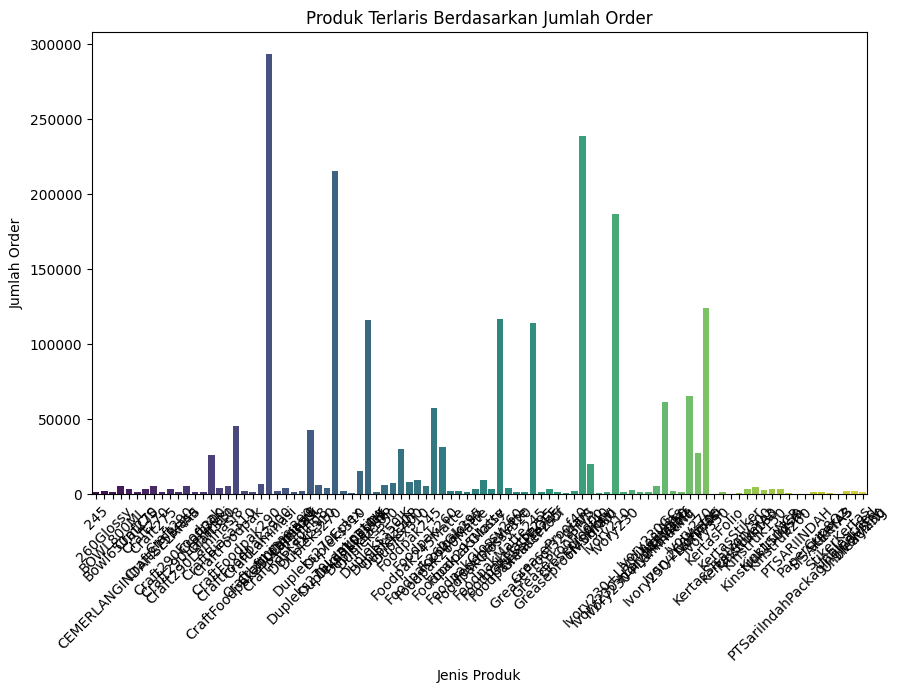

In [12]:
produk_terlaris = df_cleaned.groupby('Jenis Produk')['Jumlah Order'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=produk_terlaris.index, y=produk_terlaris.values, palette='viridis')
plt.title('Produk Terlaris Berdasarkan Jumlah Order')
plt.xlabel('Jenis Produk')
plt.ylabel('Jumlah Order')
plt.xticks(rotation=45)
plt.show()

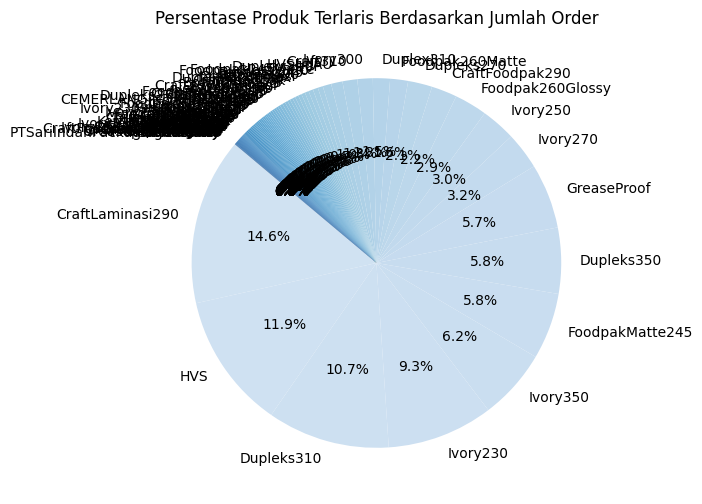

In [13]:
#pake pie chart
plt.figure(figsize=(10, 6))
colors = plt.cm.Blues(range(50, 250, int(200/len(produk_terlaris))))  # Gradasi biru
plt.pie(produk_terlaris, labels=produk_terlaris.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Persentase Produk Terlaris Berdasarkan Jumlah Order')
plt.show()

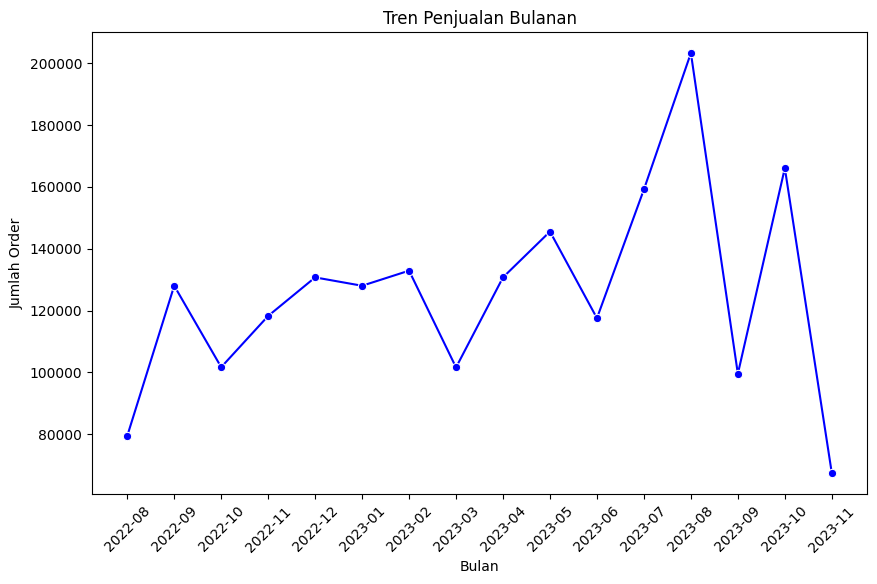

In [14]:
tren_bulanan = df_cleaned.groupby('Bulan')['Jumlah Order'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=tren_bulanan.index, y=tren_bulanan.values, marker='o', color='blue')
plt.title('Tren Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Order')
plt.xticks(rotation=45)
plt.show()